In [1]:
import pandas as pd

# Carregar o dataset netflix
df = pd.read_csv("netflix.csv")

In [2]:
# Exibir os primeiros registros do dataset 
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Verificar quais colunas possuem valores nulos

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [4]:
# Verificando se existem dados duplicados

df.duplicated().any()

False

In [5]:
# Verificando os tipos das colunas

df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [6]:
# Convertendo 'date_added' para datetime apenas onde o valor existe

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [7]:
# Verificando se a conversão foi feita com sucesso

df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [8]:
# Informações que podem de alguma forma ser importantes na análise, 
# desde que não afetem o resultado final podem ser substituidas por um valor padrão.
# Neste caso: Diretor, Elenco, País, Data em que foi adicionado a plataforma, Avaliação e Duração

df['director'].fillna('Desconhecido', inplace=True)
df['country'].fillna('Desconhecido', inplace=True)
df['rating'].fillna('Não classificado', inplace=True)
df['duration'].fillna('Desconhecido', inplace=True)

# Em 'data_added' será adicionado NaT (Not a Time)  
# (Ideal para quando a ausência de uma data é uma informação válida e não deve ser substituída por uma data fictícia)
df['date_added'].fillna(pd.NaT, inplace=True)

In [9]:
# Verificar se os dados nulos citados anteriormente foram preenchidos

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
# Traduzir nome das colunas para facilitar a leitura

df.rename(columns={
    'show_id': 'id_show',
    'type': 'tipo',
    'title': 'titulo',
    'director': 'diretor',
    'cast': 'elenco',
    'country': 'pais',
    'date_added': 'data_adicionada',
    'release_year': 'ano_lancamento',
    'rating': 'avaliacao',
    'duration': 'duracao',
    'listed_in': 'genero',
    'description': 'descricao'
}, inplace=True)

# Verificar se as colunas foram renomeadas

df.head()

,id_show,tipo,titulo,diretor,pais,data_adicionada,ano_lancamento,avaliacao,duracao,genero
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [11]:
import numpy as np

# Criar nova coluna `duracao_minutos` para armazenar a duração em minutos para filmes
df['duracao_minutos'] = np.where(df['duracao'].str.contains('min'), 
                                 df['duracao'].str.extract('(\d+)')[0].astype(float), 
                                 np.nan)

# Criar nova coluna `temporadas` para armazenar o número de temporadas para séries (Season ou Seasons)
df['temporadas'] = np.where(df['duracao'].str.contains(r'Season[s]?'), 
                            df['duracao'].str.extract('(\d+)')[0].astype(float), 
                            np.nan)


# Verificar se as colunas foram criadas corretamente
print(df[['duracao', 'duracao_minutos', 'temporadas']].head())

    duracao  duracao_minutos  temporadas
0    90 min             90.0         NaN
1  1 Season              NaN         1.0
2  1 Season              NaN         1.0
3    91 min             91.0         NaN
4   125 min            125.0         NaN


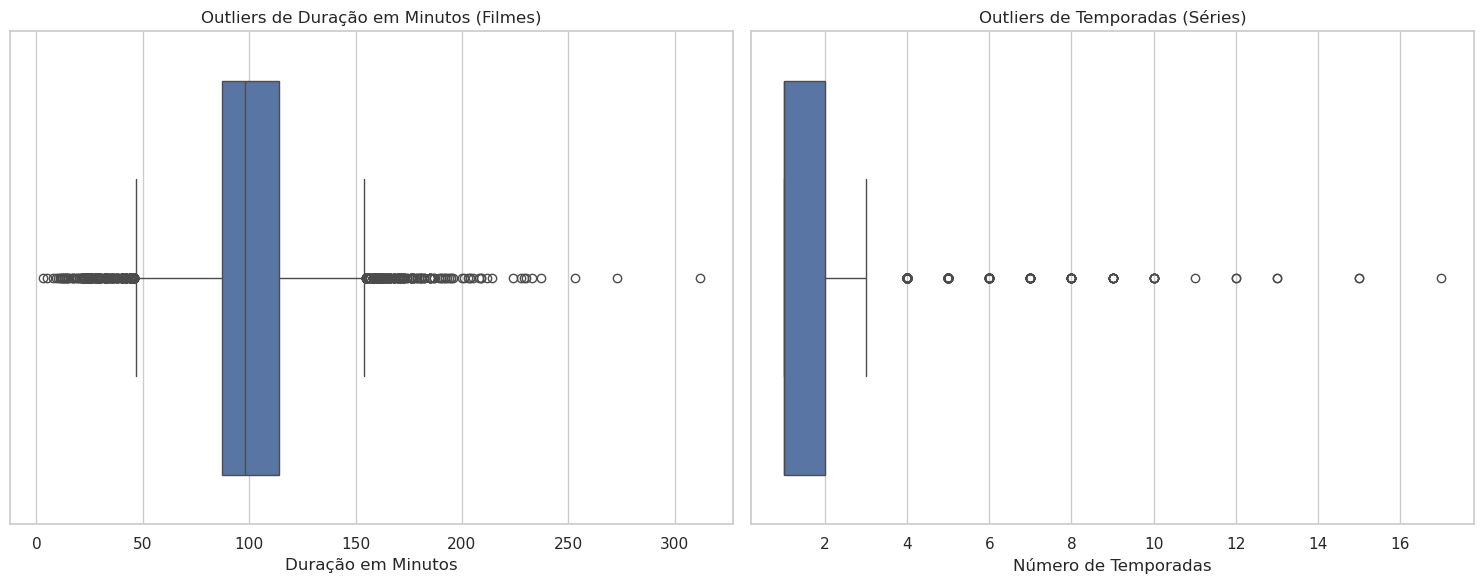

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar o estilo do gráfico para melhorar a visualização
sns.set(style="whitegrid")

# Configurar a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot para a coluna `duracao_minutos` (filmes)
sns.boxplot(data=df, x='duracao_minutos', ax=axes[0])
axes[0].set_title('Outliers de Duração em Minutos (Filmes)')
axes[0].set_xlabel('Duração em Minutos')

# Boxplot para a coluna `temporadas` (séries)
sns.boxplot(data=df, x='temporadas', ax=axes[1])
axes[1].set_title('Outliers de Temporadas (Séries)')
axes[1].set_xlabel('Número de Temporadas')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [13]:
# Importação para CSV

df.to_csv('netflix-cleaned.csv', index=False)

### Hipótese: Filmes de comédia tendem a ser mais curtos que filmes de drama.

Para testar essa hipótese, vamos comparar o tempo de duração de filmes de comédia e de drama.

Média de duração - Comedy: 67.33 minutos
Média de duração - Drama: 113.05 minutos


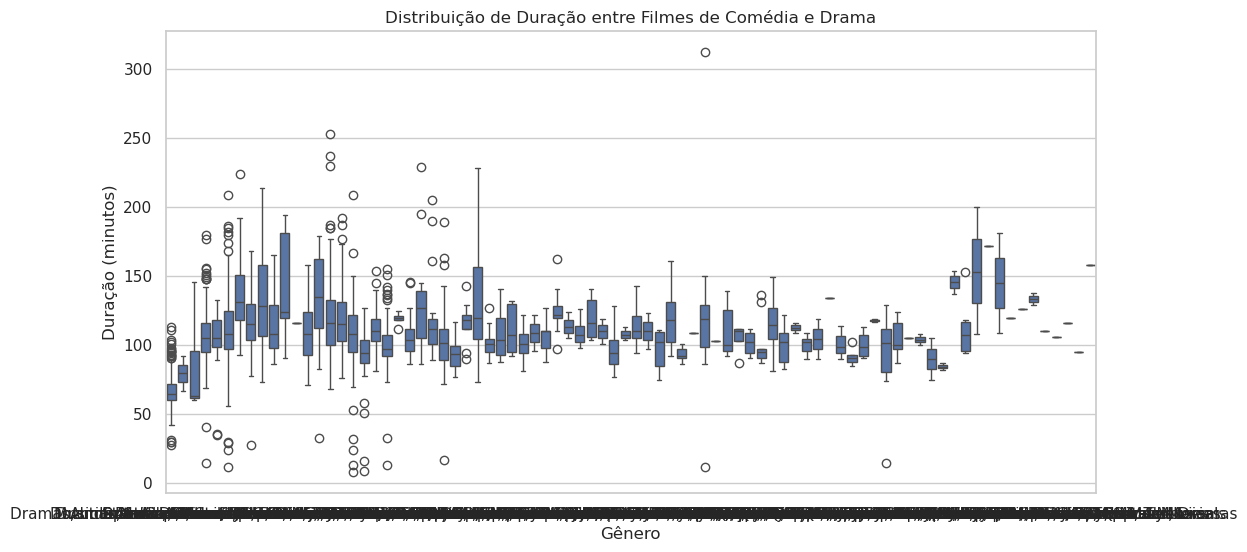

A hipótese é sustentada: filmes de comédia são, em média, mais curtos do que filmes de drama.


In [14]:
# Filtrar apenas filmes (excluindo séries) e selecionar os gêneros Comedy e Drama
df_filmes_comedia = df[(df['tipo'] == 'Movie') & (df['genero'].str.contains('Comedy')) & (df['duracao_minutos'].notna())]
df_filmes_drama = df[(df['tipo'] == 'Movie') & (df['genero'].str.contains('Drama')) & (df['duracao_minutos'].notna())]

# 1. Calcular a média de duração em minutos para comédia e drama
media_comedia = df_filmes_comedia['duracao_minutos'].mean()
media_drama = df_filmes_drama['duracao_minutos'].mean()

print(f"Média de duração - Comedy: {media_comedia:.2f} minutos")
print(f"Média de duração - Drama: {media_drama:.2f} minutos")

# Visualização gráfica para comparar a distribuição de duração entre comédia e drama
plt.figure(figsize=(12, 6))

# Gráfico boxplot para comédia e drama
sns.boxplot(data=pd.concat([df_filmes_comedia, df_filmes_drama]), x='genero', y='duracao_minutos')
plt.title("Distribuição de Duração entre Filmes de Comédia e Drama")
plt.xlabel("Gênero")
plt.ylabel("Duração (minutos)")
plt.show()

# Observação
if media_comedia < media_drama:
    print("A hipótese é sustentada: filmes de comédia são, em média, mais curtos do que filmes de drama.")
else:
    print("A hipótese não é sustentada: filmes de comédia não são mais curtos do que filmes de drama em média.")


### Hipótese: Filmes dos Estados Unidos tendem a ser mais longos do que filmes de outros países.

Essa hipótese parte da ideia de que filmes dos EUA podem ter uma duração média maior, talvez devido a características de produção ou ao estilo de narrativa. Para investigar isso, podemos calcular a média de duração de filmes produzidos nos EUA e compará-la com a de filmes de outros países.

Média de duração - Estados Unidos: 91.78 minutos
Média de duração - Outros países: 104.59 minutos


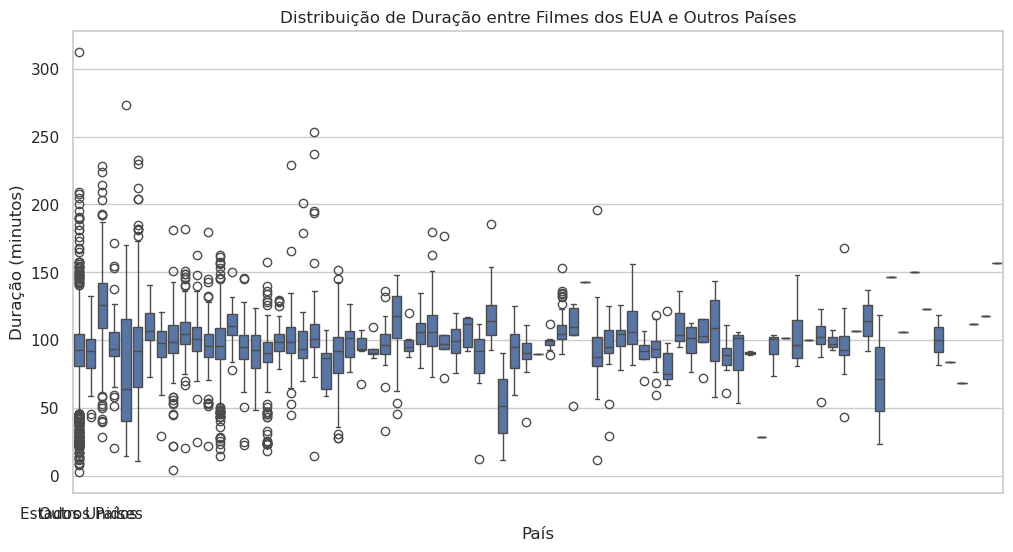

A hipótese não é sustentada: filmes dos EUA não são mais longos que filmes de outros países em média.


In [15]:
# Filtrar apenas filmes e dividir entre filmes dos EUA e de outros países
df_filmes_eua = df[(df['tipo'] == 'Movie') & (df['pais'] == 'United States') & (df['duracao_minutos'].notna())]
df_filmes_outros = df[(df['tipo'] == 'Movie') & (df['pais'] != 'United States') & (df['duracao_minutos'].notna())]

# 1. Calcular a média de duração em minutos para filmes dos EUA e de outros países
media_eua = df_filmes_eua['duracao_minutos'].mean()
media_outros = df_filmes_outros['duracao_minutos'].mean()

print(f"Média de duração - Estados Unidos: {media_eua:.2f} minutos")
print(f"Média de duração - Outros países: {media_outros:.2f} minutos")

# Visualização gráfica para comparar a duração de filmes entre EUA e outros países
plt.figure(figsize=(12, 6))

# Gráfico boxplot para a comparação
sns.boxplot(data=pd.concat([df_filmes_eua, df_filmes_outros]), x='pais', y='duracao_minutos')
plt.title("Distribuição de Duração entre Filmes dos EUA e Outros Países")
plt.xlabel("País")
plt.ylabel("Duração (minutos)")
plt.xticks([0, 1], ['Estados Unidos', 'Outros Países'])
plt.show()

# Observação
if media_eua > media_outros:
    print("A hipótese é sustentada: filmes dos EUA são, em média, mais longos do que filmes de outros países.")
else:
    print("A hipótese não é sustentada: filmes dos EUA não são mais longos que filmes de outros países em média.")
